In [1]:
import matplotlib.pyplot as pyplot
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import math
import torch.nn as nn
import math
import torch.utils.model_zoo as model_zoo
from PIL import Image
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import os, random
import pandas as pd
import seaborn as sns
sns.set(style="white")


### ResNet6

In [3]:
# load data resnet6 100% data
trainat = np.genfromtxt(r'/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet6/train_att100%rn6.csv', delimiter=',')
segmat = np.genfromtxt(r'/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet6/val_att100%rn6.csv', delimiter=',')
trainnoat = np.genfromtxt(r'/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet6/train_no_att100%rn6.csv', delimiter=',')
unsegmat = np.genfromtxt(r'/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet6/val_no_att100%rn6.csv', delimiter=',')

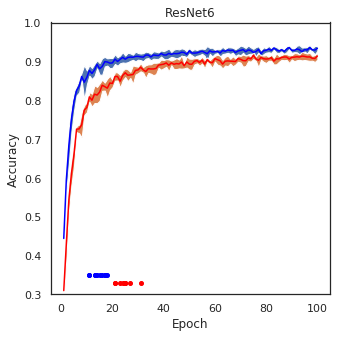

0.9356662935465743 0.9152855544581525


In [5]:
def detect(val, value):
    k=1
    for i in val:
        if i > value:
            return k
        k+=1
    return 0

seg=[]
unseg=[]
for j in range(10):
    seg.append( detect(segmat[j], np.mean(np.sort(segmat[j])[-10:] )*0.95))
    unseg.append(detect(unsegmat[j], np.mean(np.sort(unsegmat[j])[-10:])*0.95))
    
g = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,101), np.mean(segmat, axis = 0),color="blue")
plt.fill_between(np.arange(1,101), np.mean(segmat, axis = 0)+ np.std(segmat, axis = 0), np.mean(segmat, axis = 0)- np.std(segmat, axis = 0))
plt.plot(np.arange(1,101), np.mean(unsegmat, axis = 0),color="red")
plt.fill_between(np.arange(1,101),np.mean(unsegmat, axis = 0)+ np.std(unsegmat, axis = 0), np.mean(unsegmat, axis = 0)- np.std(unsegmat, axis = 0))
plt.title('ResNet6')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim((0.3,1))

for i in range(len(segmat)):
    plt.plot([unseg[i]], 0.33, marker='o', markersize=4, color="red")
    plt.plot([seg[i]], 0.35, marker='o', markersize=4, color="blue")

g.savefig("training_resnet6_segconvergence2.pdf" ,format="pdf")

plt.show()

print(np.max(np.sort(np.mean(segmat, axis = 0))[-10:]), np.max(np.sort(np.mean(unsegmat, axis = 0))[-10:]))


In [6]:
import numpy as np
import scipy.stats as stats
u_statistic, pVal = stats.mannwhitneyu(seg, unseg)
print ('P value:')
print (pVal)
print(u_statistic)

P value:
8.438150966477079e-05
0.0


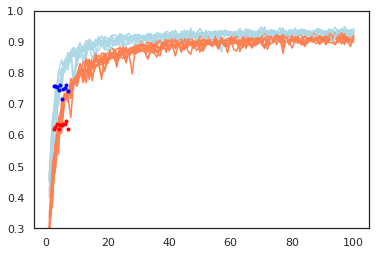

Mann-Whitney U statistic:
0.0
p value:
9.133589555477501e-05


In [7]:
segval =[]
unsegval=[]

firstseg=[]
firstunseg=[]

#print(segmat[0][13])
for idx, val in enumerate(seg):
    #print(idx,val)
    segval.append(segmat[idx][val])
    unsegval.append(unsegmat[idx][val])
    firstseg.append(np.mean(segmat[idx][:10]))
    firstunseg.append(np.mean(unsegmat[idx][:10]))

    plt.plot(np.arange(1,101),segmat[idx],color='lightblue')
    plt.plot(np.arange(1,101),unsegmat[idx],color='coral')
    
plt.plot(np.arange(2.5,7.5,0.5), firstseg, marker='o', markersize=3, color="blue", linestyle="")
plt.plot(np.arange(2.5,7.5,0.5), firstunseg, marker='o', markersize=3, color="red",linestyle="")

plt.ylim((0.3,1))
plt.show()
    
import numpy as np
import scipy.stats as stats
u_statistic, pVal = stats.mannwhitneyu(firstseg, firstunseg)
print("Mann-Whitney U statistic:")
print(u_statistic)

print ('p value:')
print (pVal)


In [150]:
print(seg)

[13, 16, 17, 11, 13, 15, 18, 17, 11, 14]


### ResNet10

In [8]:
trainat = np.genfromtxt('/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet10/train_att100%rn10.csv', delimiter=',')
segmat = np.genfromtxt('/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet10/val_att100%rn10.csv', delimiter=',')
trainnoat = np.genfromtxt('/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet10/train_no_att100%rn10.csv', delimiter=',')
unsegmat = np.genfromtxt('/home/nseijde1/Projects/scenecontext/backgroundtypicality/Data/NetworkPerformance/Exp2/resnet10/val_no_att100%rn10.csv', delimiter=',')


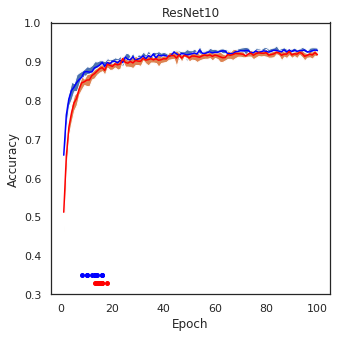

0.9295632700837342 0.9254199330777363


In [10]:

seg=[]
unseg=[]
for j in range(10):
    seg.append( detect(segmat[j], np.mean(np.sort(segmat[j])[-10:] )*0.95))
    unseg.append(detect(unsegmat[j], np.mean(np.sort(unsegmat[j])[-10:])*0.95))
    
g = plt.figure(figsize=(5,5))
plt.plot(np.arange(1,101), np.mean(segmat, axis = 0),color="blue")
plt.fill_between(np.arange(1,101), np.mean(segmat, axis = 0)+ np.std(segmat, axis = 0), np.mean(segmat, axis = 0)- np.std(segmat, axis = 0))
plt.plot(np.arange(1,101), np.mean(unsegmat, axis = 0),color="red")
plt.fill_between(np.arange(1,101),np.mean(unsegmat, axis = 0)+ np.std(unsegmat, axis = 0), np.mean(unsegmat, axis = 0)- np.std(unsegmat, axis = 0))
plt.title('ResNet10')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim((0.3,1))

for i in range(len(segmat)):
    plt.plot([unseg[i]], 0.33, marker='o', markersize=4, color="red")
    plt.plot([seg[i]], 0.35, marker='o', markersize=4, color="blue")

g.savefig("training_resnet10_segconvergence2.pdf" ,format="pdf")

plt.show()

print(np.max(np.sort(np.mean(segmat, axis = 0))[-10:]), np.max(np.sort(np.mean(unsegmat, axis = 0))[-10:]))


In [13]:
import numpy as np
import scipy.stats as stats
u_statistic, pVal = stats.mannwhitneyu(seg, unseg)
print ('P value:')
print (pVal)
print(u_statistic)

P value:
0.011912968930634654
20.0


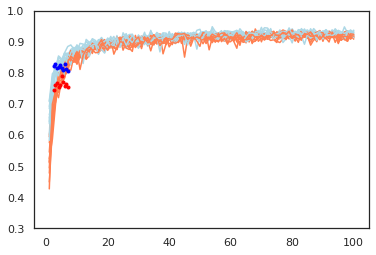

Mann-Whitney U statistic:
0.0
p value:
9.133589555477501e-05


In [15]:
segval =[]
unsegval=[]

firstseg=[]
firstunseg=[]

for idx, val in enumerate(seg):
    segval.append(segmat[idx][val])
    unsegval.append(unsegmat[idx][val])
    firstseg.append(np.mean(segmat[idx][:10]))
    firstunseg.append(np.mean(unsegmat[idx][:10]))

    plt.plot(np.arange(1,101),segmat[idx],color='lightblue')
    plt.plot(np.arange(1,101),unsegmat[idx],color='coral')
    
plt.plot(np.arange(2.5,7.5,0.5), firstseg, marker='o', markersize=3, color="blue", linestyle="")
plt.plot(np.arange(2.5,7.5,0.5), firstunseg, marker='o', markersize=3, color="red",linestyle="")

plt.ylim((0.3,1))
plt.show()
    
import numpy as np
import scipy.stats as stats
u_statistic, pVal = stats.mannwhitneyu(firstseg, firstunseg)
print("Mann-Whitney U statistic:")
print(u_statistic)

print ('p value:')
print (pVal)
